In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Read the dataset
X = pd.read_csv("dados3.csv")

### PCA

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the PCA object
pca = PCA()
 
# Run PCA on scaled data and obtain the scores array
T = pca.fit_transform(StandardScaler().fit_transform(X))

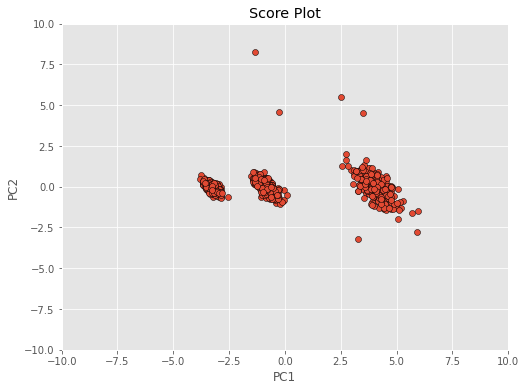

In [16]:
# Score plot of the first 2 PC
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(T[:, 0], T[:, 1], edgecolors='k', cmap='jet')
    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot')
plt.show()

### Euclidean distance

In [29]:
# Compute the euclidean distance using the first 5 PC
euclidean = np.zeros(X.shape[0])
for i in range(5):
    euclidean += (T[:,i] - np.mean(T[:,:5]))**2/np.var(T[:,:5])

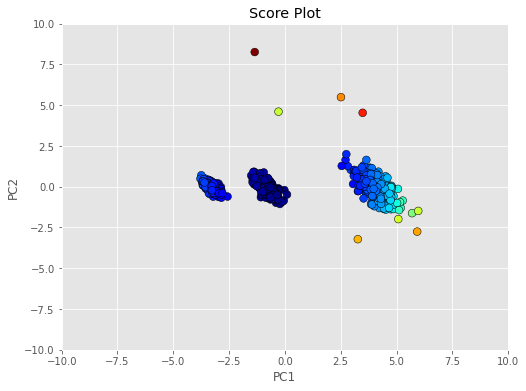

In [30]:
colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(T[:, 0], T[:, 1], c=colors, edgecolors='k', s=60)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    plt.title('Score Plot')
plt.show()

### Mahalanobis Distance

In [31]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet
 
# fit a Minimum Covariance Determinant (MCD) robust estimator to data 
robust_cov = MinCovDet().fit(T[:,:5])
 
# Get the Mahalanobis distance
m = robust_cov.mahalanobis(T[:,:5])

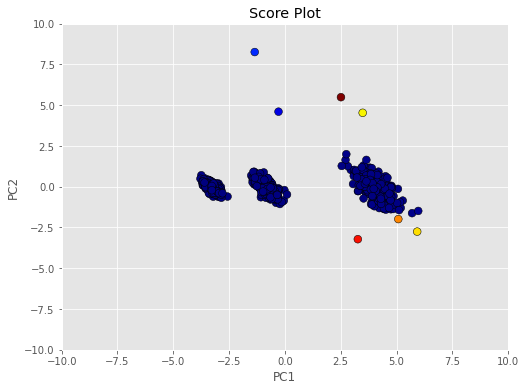

In [32]:
colors = [plt.cm.jet(float(i)/max(m)) for i in m]
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(T[:, 0], T[:, 1], c=colors, edgecolors='k', s=60)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    plt.title('Score Plot')
plt.show()

### Compare of Outliers Detectors

In [37]:
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

In [51]:
def plot(X, y_pred, name):
        colors = np.array(["#377eb8", "#ff7f00"])
        plt.figure(figsize=(7, 7))        
        plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], s=6, color=colors[(y_pred + 1) // 2])
        
        inl = (y_pred == 1).sum()
        out = (y_pred == -1).sum()

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text( 0.99, 0.01, "Outliers:"+str(out)+" Inliers:"+str(inl),
            transform=plt.gca().transAxes,
            size=12, horizontalalignment="right", )
        plt.show()

def run_algorithms(X, n_samples, outliers_fraction):
    anomaly_algorithms = [
        ("Robust covariance", EllipticEnvelope(contamination = outliers_fraction)),
        ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
        (
            "One-Class SVM (SGD)",
            make_pipeline(
                Nystroem(gamma=0.1, random_state=42, n_components=10),
                SGDOneClassSVM(
                    nu=outliers_fraction,
                    shuffle=True,
                    fit_intercept=True,
                    random_state=42,
                    tol=1e-6,
                ),
            ),
        ),
        (
            "Isolation Forest",
            IsolationForest(contamination=outliers_fraction, random_state=42),
        ),
        (
            "Local Outlier Factor",
            LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction),
        ),
    ]
    

    for name, algorithm in anomaly_algorithms:        
        algorithm.fit(df)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        plot(X, y_pred, name)

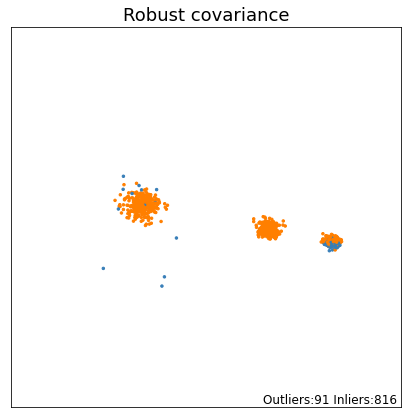

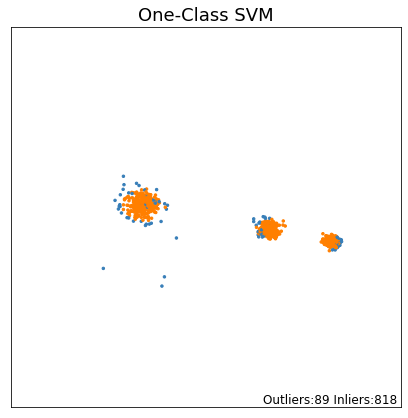

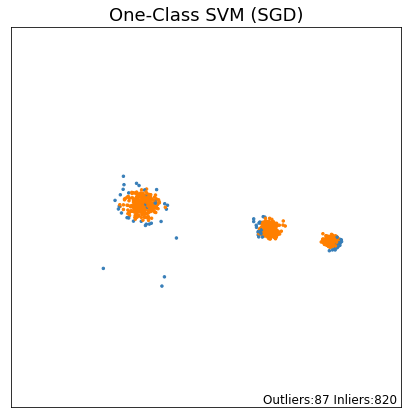

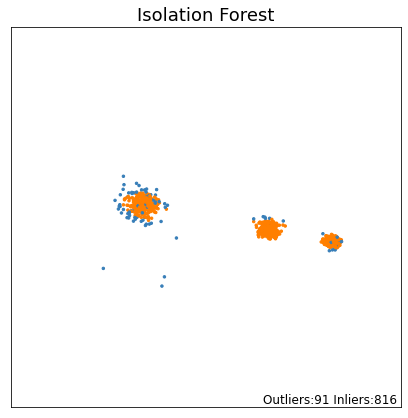

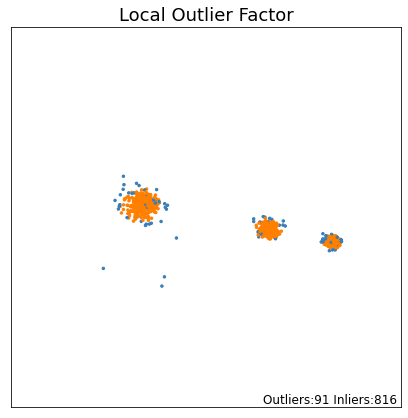

In [54]:
X_np = X.to_numpy()
n_samples = X_np.shape[0]
outliers_fraction = 0.1

# Call algorithms
run_algorithms(X_np, n_samples, outliers_fraction)